# Home task 2.1


### 1. Апостериорное распределение для параметра распределения Пуассона.


Количество срабатываний счетчика Гейгера за минуту $n$ подчиняется распределению Пуассона:
$$
P_\lambda(n)=\frac{\lambda^n}{n !} e^{-\lambda} \text {. }
$$
1. В ходе эксперимента счетчик Гейгера сработал за минуту $m$ раз. С помощью теоремы Байеса определите апостериорное распределение на $\lambda$. Указание: априорную плотность вероятности $\lambda$ можно считать постоянной (так как мы изначально ничего не знаем про $\lambda$ ) .
2. Эксперимент повторили еще раз, в этот раз счетчик Гейгера сработал за минуту $m^{\prime}$ раз. Как обновилось апостериорное распределение на $\lambda$ ?

**Примечание.**

Такая плотность вероятности не будет нормируема. Чтобы сделать рассуждение более строгим, можно ввести обрезку на очень больших $\lambda$ (так как это нереалистичные значения). Другими словами, можно считать, что априорная плотность вероятности $p_0(\lambda)-$ это какая-то очень медленно меняющаяся функция и как-то убывающая на бесконечности. Тогда в числителе и знаменателе формулы Байеса она будет домножаться на гораздо более быструю функцию и поэтому можно заменить $p_0(\lambda) \rightarrow p_0(0)$. Константа $p_0(0)$ должна сократиться в ходе вычислений.

### 2. Апостериорное распределение для аргумента нормального распределения.

Пусть имеется априорное распределение на вектор $\boldsymbol{x}$, задаваемое симметричной положительно определенной матрицей $A$ :
$$
p_0(\boldsymbol{x})=\frac{1}{Z} e^{-\frac{\boldsymbol{x}^T A \boldsymbol{x}}{2}} .
$$
Было произведено измерение величин $\boldsymbol{x}$, которое дало значение $\boldsymbol{x}_1$. Найдете апостериорное распределение на $\boldsymbol{x}$.

Hint: Мы изначально ничего не знаем об $A$ - надо ввести на него какое-то априорное распределение. Предлагается брать равномерное.

### 3. L1-регуляризация.

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_1$-регуляризации. Разрешается использовать библиотечную реализацию регрессии, как в примере ниже:

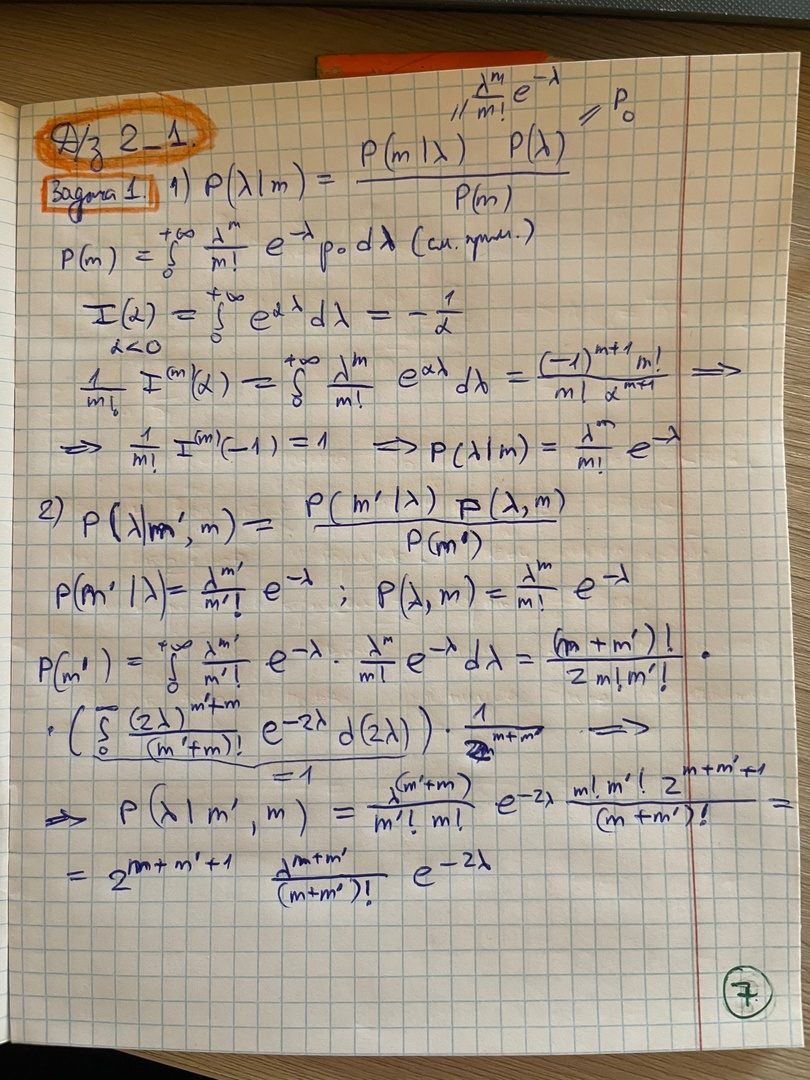


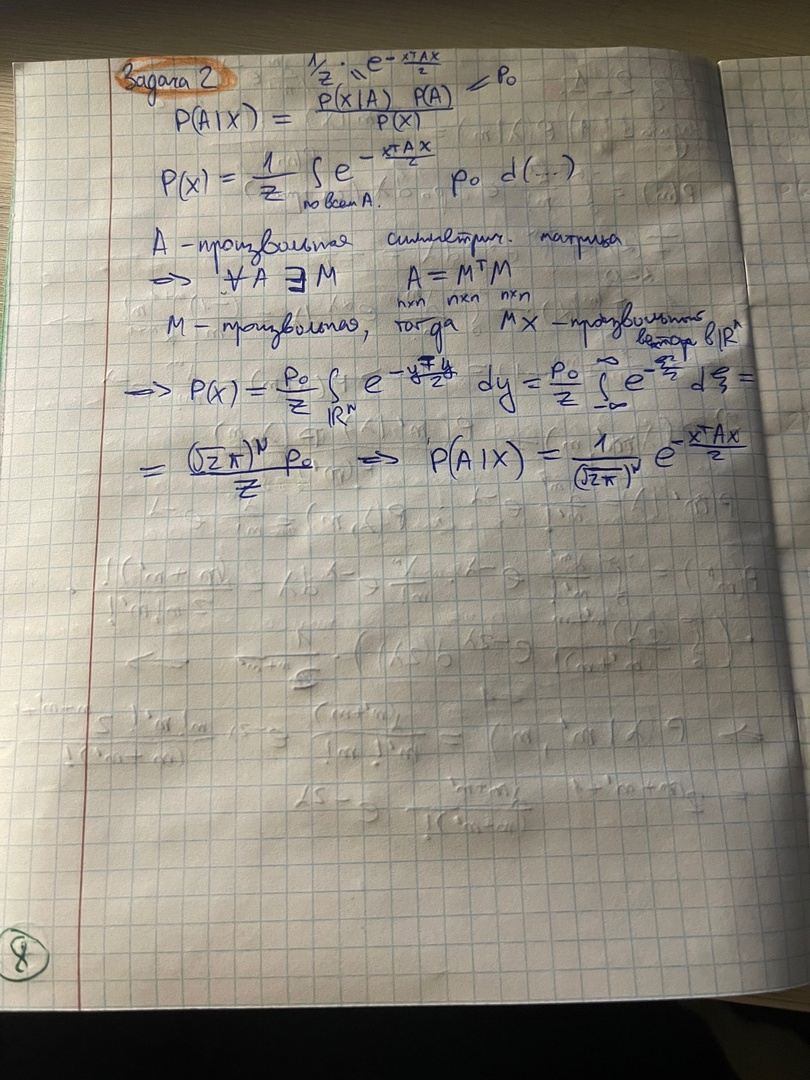

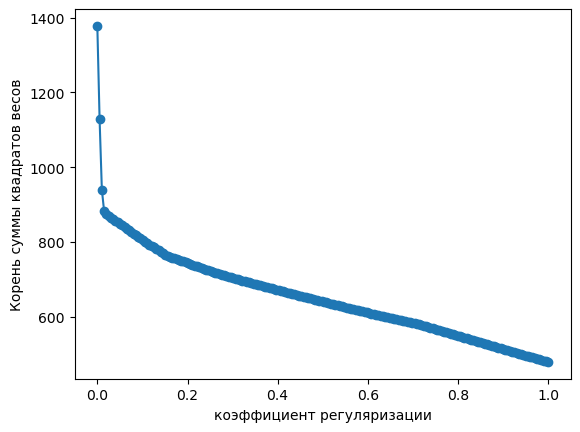

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

data, target = load_diabetes(return_X_y=True)
a = 1e-6
alpha_linspace = np.linspace(a, 1, 200)

values = []

for a_ in alpha_linspace:
    lm = Lasso(a_)
    lm.fit(data, target)
    values.append(np.sqrt(np.sum(lm.coef_ ** 2)))

plt.plot(alpha_linspace, values, '-o')
plt.xlabel('коэффициент регуляризации')
plt.ylabel('Корень суммы квадратов весов')
plt.show()

### 4. K-fold кроссвалидация и L1-регуляризация градиентным спуском.

На семинаре обсуждалось решение задачи регрессии с $L 1$-регуляризацией с помощью метода градиентного спуска. C помощью K-Fold кроссвалидаций $(K=3)$ осуществите для этого метода подбор параметров: коэффициент перед регуляризатором и параметр градиентного спуска (learning rate). В качестве данных возьмите значения какой-нибудь неполиномиальной функции на равномерной или случайной сетке (на выбор семинариста) с добавленным гауссовым шумом. Насколько стабильно по отношению к запуску работает градиентный спуск?

Указание.
Можно взять функцию градиентного спуска из семинара или встроенную реализацию.  Например, можете использовать этот код

In [6]:
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w


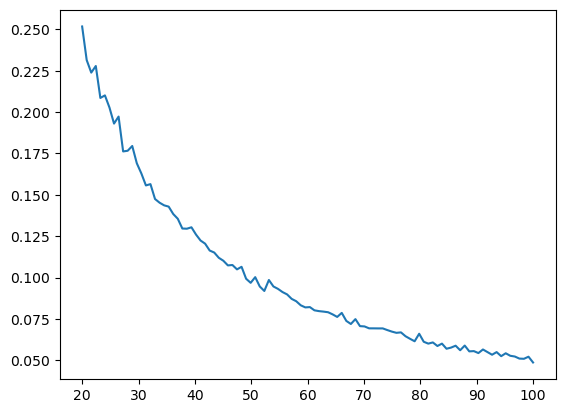

In [8]:
x = np.linspace(20, 100, 100)
y_target = (5 + np.random.normal(0, 0.1, size=x.shape)) / x

plt.plot(x, y_target)
plt.show()